# STUDENT PERFORMANCE
[Link data](https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset/data) <br>
WITH TARGET VARIABLE
GradeClass: Classification of students' grades based on GPA:
* 0: 'A' (GPA >= 3.5)
* 1: 'B' (3.0 <= GPA < 3.5)
* 2: 'C' (2.5 <= GPA < 3.0)
* 3: 'D' (2.0 <= GPA < 2.5)
* 4: 'F' (GPA < 2.0)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# def preprocessing_cat_gpa_to_numerical(gpa):
#     grades = {"F": 0,
#               "D": 1,
#               "C": 2,
#               "B": 3,
#               "A": 4}
#     return grades.get(gpa)

In [3]:
def preprocessing_GPA_to_cat(gpa):
  gpa = np.round(gpa,1)
  if gpa >= 3.53:
    return 'A'
  if 3.0 <= gpa <= 3.5:
    return 'B'
  if 2.5 <= gpa < 3.0:
    return 'C'
  if 2.0  <= gpa <2.5:
    return 'D'
  if gpa < 2.0 :
    return 'F'

In [4]:
df = pd.read_csv("/content/Student_performance_data _.csv")

In [5]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


# EDA

## Undestranding data

### Check null data

In [6]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

### Check data type


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


Most type data is int64, but not necessarily is awalays numerical maybe categorical like:
* range age
* Gender (with numerical lime 0/1)

# Feature Selection

Academic Performance <br>
GPA: Grade Point Average on a scale from 2.0 to 4.0, influenced by
* **study habits**
* **parental involvement**
* **extracurricular activities**.

Study Habits
* StudyTimeWeekly: Weekly study time in hours, ranging from 0 to 20.
* Absences: Number of absences during the school year, ranging from 0 to 30.
* Tutoring: Tutoring status, where 0 indicates No and 1 indicates Yes.

Parental Involvement
ParentalSupport: The level of parental support, coded as follows:
* 0: None
* 1: Low
* 2: Moderate
* 3: High
* 4: Very High

Extracurricular Activities <br>
Extracurricular: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
* Sports: Participation in sports, where 0 indicates No and 1 indicates Yes.
* Music: Participation in music activities, where 0 indicates No and 1 indicates Yes.
* Volunteering: Participation in volunteering, where 0 indicates No and 1 indicates Yes.

In [8]:
df["Sports"]

0       0
1       0
2       0
3       0
4       0
       ..
2387    0
2388    1
2389    0
2390    1
2391    0
Name: Sports, Length: 2392, dtype: int64

In [9]:
def pipeline(gpa):
  gpa = preprocessing_GPA_to_cat(gpa)
  # gpa = preprocessing_cat_gpa_to_numerical(gpa)
  return gpa

In [10]:
df["GPA_Cat"] = df["GPA"].apply(pipeline)

In [11]:
df["GPA_Cat"].isnull().sum()

0

In [12]:
df["GPA_Cat"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2392 entries, 0 to 2391
Series name: GPA_Cat
Non-Null Count  Dtype 
--------------  ----- 
2392 non-null   object
dtypes: object(1)
memory usage: 18.8+ KB


In [13]:
df["GPA"]

0       2.929196
1       3.042915
2       0.112602
3       2.054218
4       1.288061
          ...   
2387    3.455509
2388    3.279150
2389    1.142333
2390    1.803297
2391    2.140014
Name: GPA, Length: 2392, dtype: float64

In [14]:
Y = df["GPA_Cat"]
X = df[["StudyTimeWeekly","Absences","Tutoring","ParentalSupport","Sports","Music","Volunteering"]]

In [15]:
df["GPA_Cat"]

0       C
1       B
2       F
3       D
4       F
       ..
2387    B
2388    B
2389    F
2390    F
2391    D
Name: GPA_Cat, Length: 2392, dtype: object

In [16]:
X.columns

Index(['StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Sports',
       'Music', 'Volunteering'],
      dtype='object')

### Check Distribution data

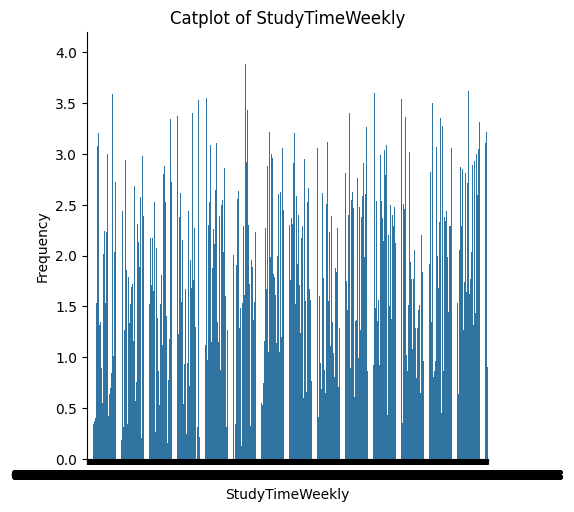

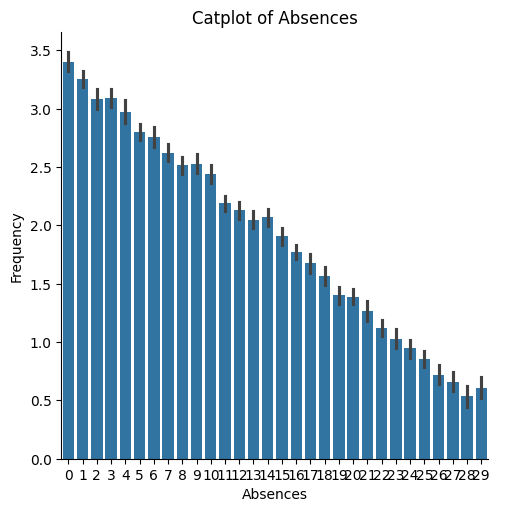

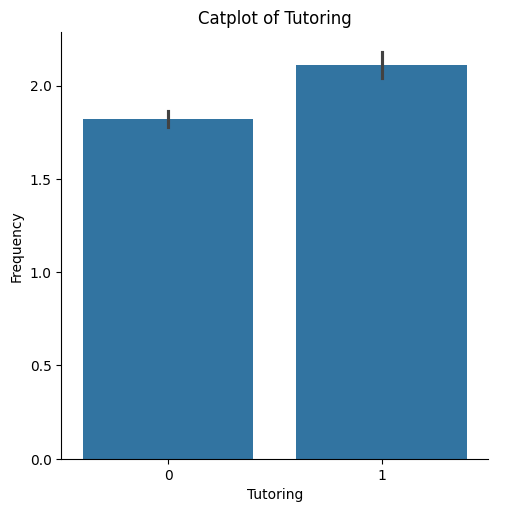

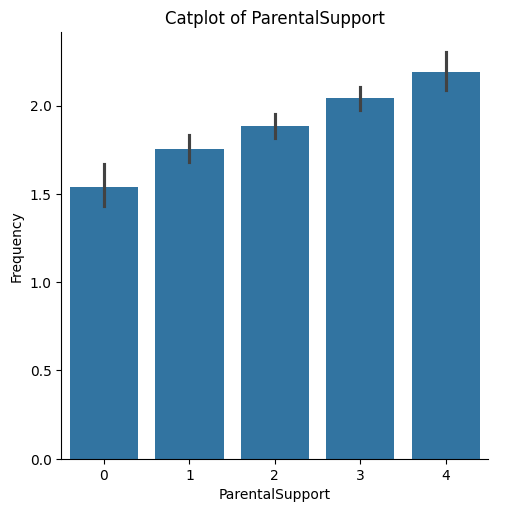

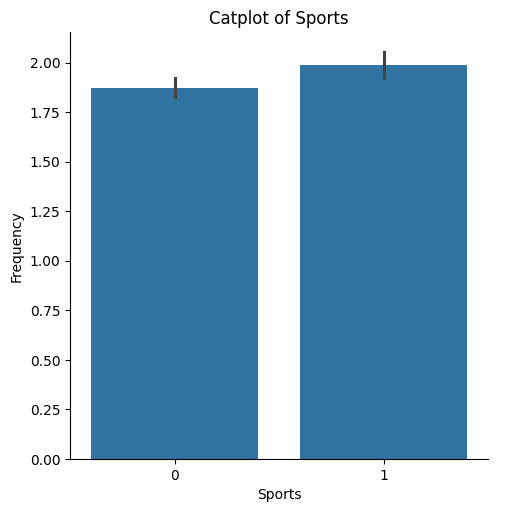

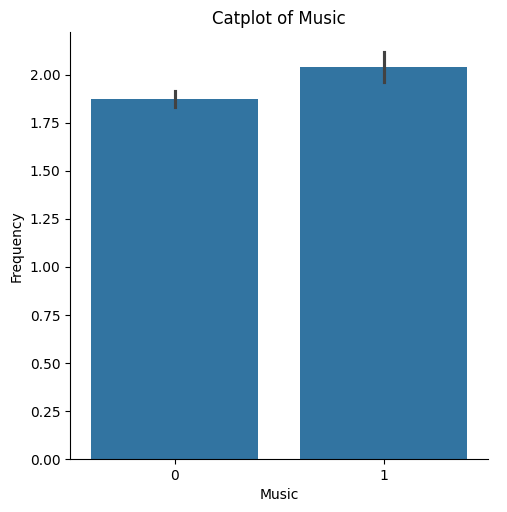

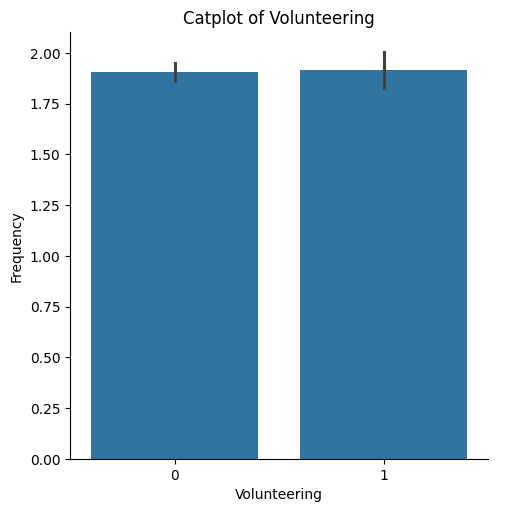

In [17]:
for target in X.columns:
  sns.catplot(data=df, x=target,y='GPA',kind='bar')
  plt.xlabel(f'{target}')
  plt.ylabel('Frequency')
  plt.title(f'Catplot of {target}')
  plt.show()

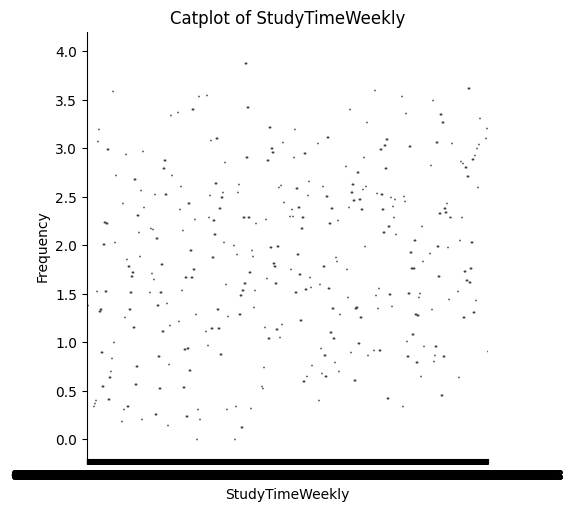

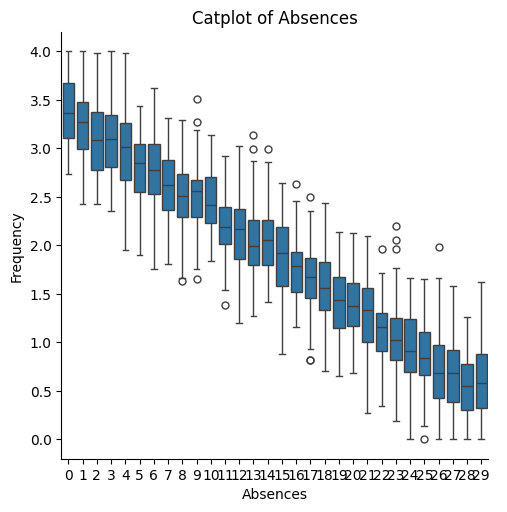

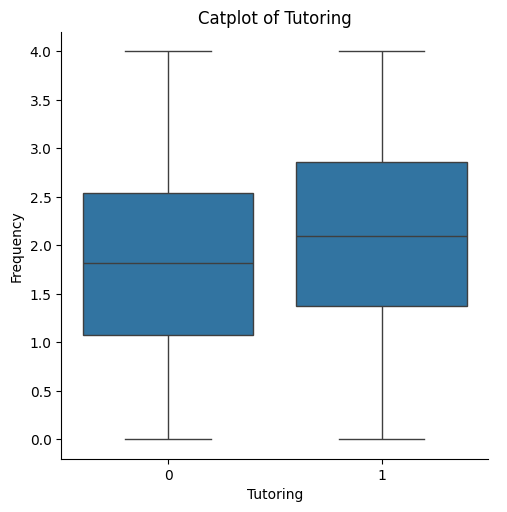

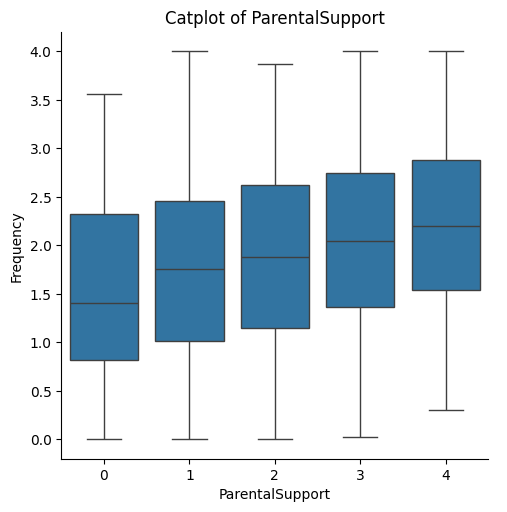

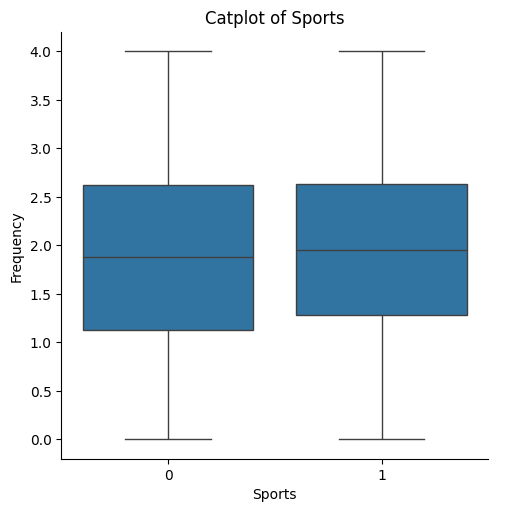

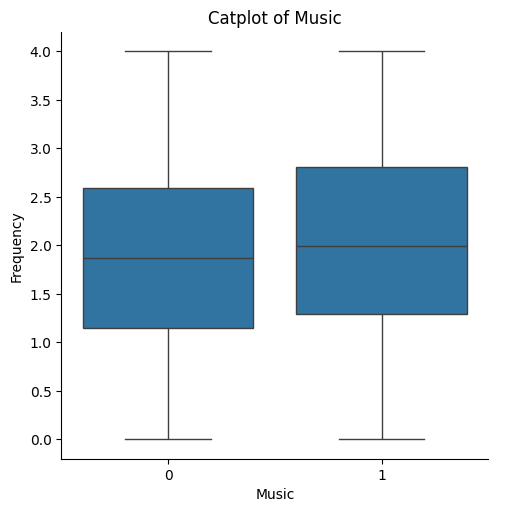

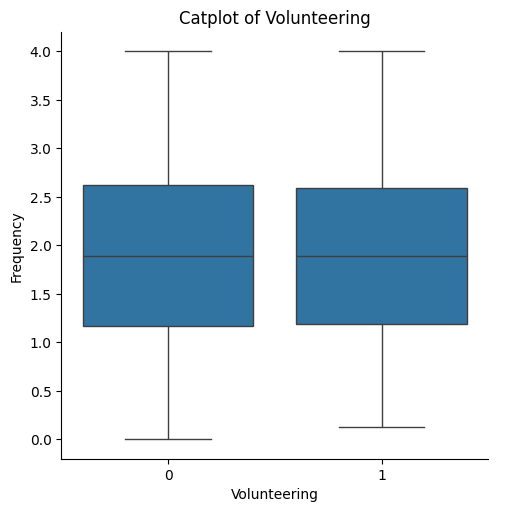

In [18]:
for target in X.columns:
  sns.catplot(data=df, x=target,y='GPA',kind='box')
  plt.xlabel(f'{target}')
  plt.ylabel('Frequency')
  plt.title(f'Catplot of {target}')
  plt.show()

The data With Selection Feature is Discrete Data

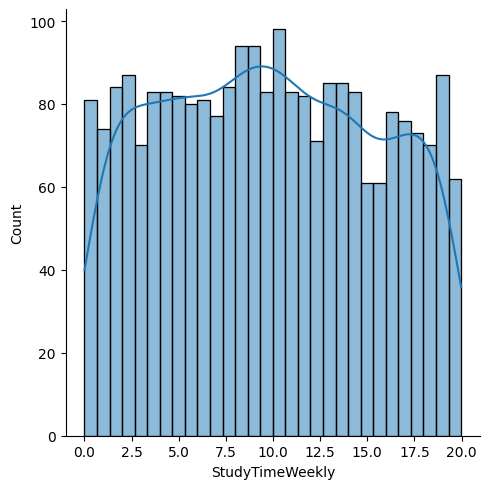

In [19]:
sns.displot(data=df,x='StudyTimeWeekly',kde=True,bins=30);

conclusion :
* StudyTimeWeekly (normal distribution)


# Modelling

## Decision tree

### Model Selection Wtih Hyperparameters

In [20]:
import numpy as np

In [21]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [22]:
parameters = {'criterion':('gini', 'entropy','log_loss'),
              'max_depth':np.arange(start=1,stop=50,step=1),
              'min_samples_split':np.arange(start=2,stop=50,step=1)
              }

In [23]:
tree_clf = DecisionTreeClassifier()

In [24]:
clf_random_search_decision_tree= RandomizedSearchCV(tree_clf, parameters,return_train_score=True, cv = 5)

In [25]:
clf_random_search_decision_tree

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy',
                                                      'log_loss'),
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
                   return_train_score=True)

In [26]:
clf_random_search_decision_tree.fit(X=X,y=Y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy',
                                                      'log_loss'),
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
                   return_train_score=True)

In [27]:
dec_tree = clf_random_search_decision_tree.fit(X=X,y=Y)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
print(
    "Generalization score with hyperparameters tuning:\n"
    f"{clf_random_search_decision_tree.cv_results_['mean_test_score'].mean():.3f} ± {clf_random_search_decision_tree.cv_results_['mean_test_score'].std():.3f}"
)

Generalization score with hyperparameters tuning:
0.746 ± 0.005


In [30]:
acc_score = []
for test in np.round(np.arange(start = 0.1, step = 0.1, stop=0.6),1):
  X_train, X_test, y_train, y_test = train_test_split(
    X, Y,
    test_size=test,
    random_state=42)
  # clf_random_search_decision_tree.fit(X=X,y=Y)
  prediction_tree_randomsearch = clf_random_search_decision_tree.predict(X_test)
  print('\n',classification_report(y_test, prediction_tree_randomsearch))
  prediksi_benar = np.sum(prediction_tree_randomsearch== y_test)
  prediksi_salah = np.sum(prediction_tree_randomsearch != y_test)
  print(f'Total prediksi_benar test data ->{test} : {prediksi_benar}')
  print(f'Total prediksi_salah test data ->{test}: {prediksi_salah}')
  print(f'Score with total data train-> {len(y_train)} and data test {len(y_test)}: {clf_random_search_decision_tree.score(X_train, y_train), clf_random_search_decision_tree.score(X_test, y_test)}')
  print(f'{confusion_matrix(y_test, prediction_tree_randomsearch)}')


               precision    recall  f1-score   support

           A       0.20      0.20      0.20         5
           B       0.70      0.68      0.69        34
           C       0.64      0.71      0.68        35
           D       0.69      0.50      0.58        40
           F       0.91      0.97      0.94       126

    accuracy                           0.80       240
   macro avg       0.63      0.61      0.62       240
weighted avg       0.79      0.80      0.79       240

Total prediksi_benar test data ->0.1 : 191
Total prediksi_salah test data ->0.1: 49
Score with total data train-> 2152 and data test 240: (0.7969330855018587, 0.7958333333333333)
[[  1   4   0   0   0]
 [  4  23   7   0   0]
 [  0   5  25   5   0]
 [  0   1   7  20  12]
 [  0   0   0   4 122]]

               precision    recall  f1-score   support

           A       0.33      0.18      0.24        11
           B       0.71      0.72      0.72        68
           C       0.64      0.72      0.68      

As We can see most high accuracy when train test split in 0.5
is 0.86% acc

### Evalutaion

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y,
    test_size=0.5,
    random_state=42)
prediction_tree_randomsearch = clf_random_search_decision_tree.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [33]:
confusion_matrix(y_test, prediction_tree_randomsearch)

array([[ 14,  13,   1,   0,   0],
       [  5, 112,  27,   4,   0],
       [  0,  31, 126,  26,   1],
       [  0,   5,  34, 125,  42],
       [  0,   0,   1,  34, 595]])

In [34]:
print(classification_report(y_test, prediction_tree_randomsearch ))
prediksi_benar = np.sum(prediction_tree_randomsearch  == y_test)
prediksi_salah = np.sum(prediction_tree_randomsearch  != y_test)
print(f'Total prediksi_benar : {prediksi_benar}')
print(f'Total prediksi_salah : {prediksi_salah}')

              precision    recall  f1-score   support

           A       0.74      0.50      0.60        28
           B       0.70      0.76      0.72       148
           C       0.67      0.68      0.68       184
           D       0.66      0.61      0.63       206
           F       0.93      0.94      0.94       630

    accuracy                           0.81      1196
   macro avg       0.74      0.70      0.71      1196
weighted avg       0.81      0.81      0.81      1196

Total prediksi_benar : 972
Total prediksi_salah : 224


In [35]:
clf_random_search_decision_tree.best_estimator_.feature_importances_

array([0.10828961, 0.78040298, 0.03107064, 0.0707296 , 0.00574797,
       0.0037592 , 0.        ])

Feature: 0, Score: 0.10829
Feature: 1, Score: 0.78040
Feature: 2, Score: 0.03107
Feature: 3, Score: 0.07073
Feature: 4, Score: 0.00575
Feature: 5, Score: 0.00376
Feature: 6, Score: 0.00000


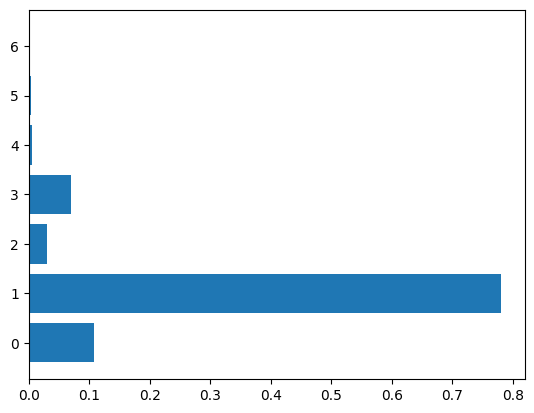

In [36]:
importance = clf_random_search_decision_tree.best_estimator_.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.barh([x for x in range(len(importance))], importance)
plt.show()

In [37]:
X.columns

Index(['StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Sports',
       'Music', 'Volunteering'],
      dtype='object')

In [38]:
clf_random_search_decision_tree.best_estimator_.feature_importances_


array([0.10828961, 0.78040298, 0.03107064, 0.0707296 , 0.00574797,
       0.0037592 , 0.        ])

In [39]:
importances = clf_random_search_decision_tree.best_estimator_.feature_importances_


StudyTimeWeekly: 0.1083
Absences: 0.7804
Tutoring: 0.0311
ParentalSupport: 0.0707
Sports: 0.0057
Music: 0.0038
Volunteering: 0.0000


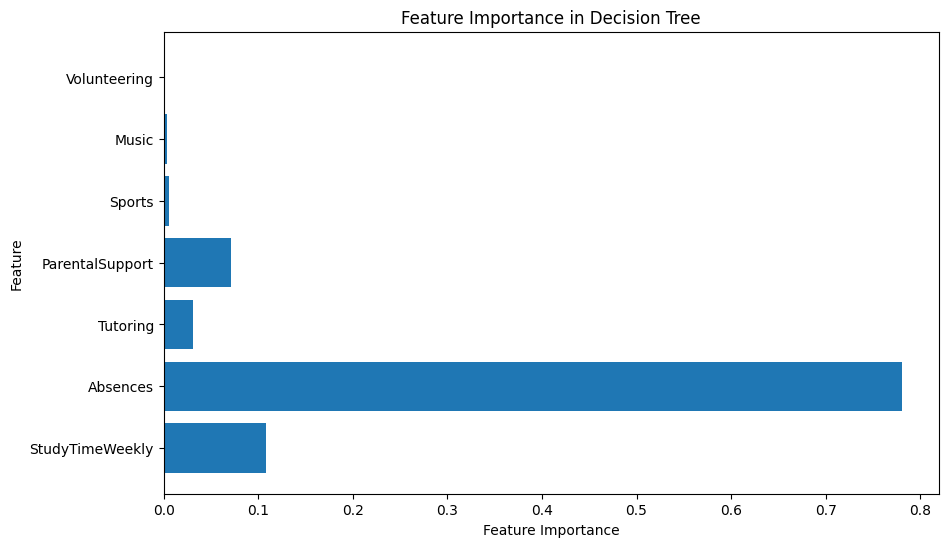

In [40]:
feature_names = X.columns
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance:.4f}")

plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(range(len(importances)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree')
plt.show()

Feature most importance as we can see the feature is Absences

In [41]:
df_dec_tree_clf = pd.DataFrame(classification_report(y_test, prediction_tree_randomsearch, output_dict = True ))

## K-nearest Neighbor

### Normalize feature **StudyTimeWeekly**

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

In [43]:
StudyTimeWeekly_std = X[["StudyTimeWeekly"]]

In [44]:
scaler = StandardScaler()

In [45]:
scaler_studyTimeWeekly= scaler.fit_transform(StudyTimeWeekly_std)

In [46]:
X.columns

Index(['StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Sports',
       'Music', 'Volunteering'],
      dtype='object')

In [47]:
X.drop(columns=['StudyTimeWeekly'],inplace=True)

<ipython-input-47-b8d575faec2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['StudyTimeWeekly'],inplace=True)


In [48]:
X.head()

,Absences,Tutoring,ParentalSupport,Sports,Music,Volunteering
0,7,1,2,0,1,0
1,0,0,1,0,0,0
2,26,0,2,0,0,0
3,14,0,3,0,0,0
4,17,1,3,0,0,0


In [49]:
std_studyTimeWeekly =pd.DataFrame({

    "std_studyTimeWeekly":scaler_studyTimeWeekly.flatten()})

In [50]:
X_knn_scaler = pd.concat([std_studyTimeWeekly,X],axis=1)

In [51]:
X_knn_scaler

,std_studyTimeWeekly,Absences,Tutoring,ParentalSupport,Sports,Music,Volunteering
0,1.780336,7,1,2,0,1,0
1,0.997376,0,0,1,0,0,0
2,-0.984045,26,0,2,0,0,0
3,0.045445,14,0,3,0,0,0
4,-0.902311,17,1,3,0,0,0
...,...,...,...,...,...,...,...
2387,0.160762,2,0,4,0,0,0
2388,-0.387285,4,1,4,1,0,0
2389,-0.524895,20,0,2,0,0,1
2390,0.467950,17,0,2,1,1,0


### Model Selection HyperParameter

In [52]:
parameters = {'n_neighbors':np.arange(start = 1, stop = 50, step = 1),
              'metric':('minkowski','euclidean','manhattan'
                        ),
              'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute'),
              'p' : np.arange(start = 1, stop = 3, step = 1)
              }

In [53]:
knn = KNeighborsClassifier()

In [54]:
clf_random_search_knn= RandomizedSearchCV(knn, parameters,return_train_score=True,error_score='raise',cv = 5)

In [55]:
clf_random_search_knn

RandomizedSearchCV(cv=5, error_score='raise', estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ('auto', 'ball_tree',
                                                      'kd_tree', 'brute'),
                                        'metric': ('minkowski', 'euclidean',
                                                   'manhattan'),
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'p': array([1, 2])},
                   return_train_score=True)

#### Train

In [56]:
clf_random_search_knn.fit(X_knn_scaler,Y)

RandomizedSearchCV(cv=5, error_score='raise', estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ('auto', 'ball_tree',
                                                      'kd_tree', 'brute'),
                                        'metric': ('minkowski', 'euclidean',
                                                   'manhattan'),
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'p': array([1, 2])},
                   return_train_score=True)

In [57]:
X_knn_scaler

,std_studyTimeWeekly,Absences,Tutoring,ParentalSupport,Sports,Music,Volunteering
0,1.780336,7,1,2,0,1,0
1,0.997376,0,0,1,0,0,0
2,-0.984045,26,0,2,0,0,0
3,0.045445,14,0,3,0,0,0
4,-0.902311,17,1,3,0,0,0
...,...,...,...,...,...,...,...
2387,0.160762,2,0,4,0,0,0
2388,-0.387285,4,1,4,1,0,0
2389,-0.524895,20,0,2,0,0,1
2390,0.467950,17,0,2,1,1,0


In [58]:
for test in np.round(np.arange(start = 0.1, step = 0.1, stop=0.6),1):
  X_train, X_test, y_train, y_test = train_test_split(
    X_knn_scaler, Y,
    test_size=test,
    random_state=42)
  # clf_random_search_knn.fit(X_train,y_train)
  prediction_knn_randomsearch = clf_random_search_knn.predict(X_test)
  print('\n',classification_report(y_test, prediction_knn_randomsearch))
  prediksi_benar = np.sum(prediction_knn_randomsearch== y_test)
  prediksi_salah = np.sum(prediction_knn_randomsearch != y_test)
  print(f'Total prediksi_benar test data ->{test} : {prediksi_benar}')
  print(f'Total prediksi_salah test data ->{test}: {prediksi_salah}')
  print(f'Score with total data train-> {len(y_train)} and data test {len(y_test)}: {clf_random_search_knn.score(X_train, y_train), clf_random_search_knn.score(X_test, y_test)}')
  print(f'{confusion_matrix(y_test, prediction_knn_randomsearch)}')


               precision    recall  f1-score   support

           A       1.00      0.20      0.33         5
           B       0.79      0.79      0.79        34
           C       0.71      0.77      0.74        35
           D       0.70      0.53      0.60        40
           F       0.89      0.97      0.93       126

    accuracy                           0.82       240
   macro avg       0.82      0.65      0.68       240
weighted avg       0.82      0.82      0.81       240

Total prediksi_benar test data ->0.1 : 198
Total prediksi_salah test data ->0.1: 42
Score with total data train-> 2152 and data test 240: (0.7987918215613383, 0.825)
[[  1   4   0   0   0]
 [  0  27   6   1   0]
 [  0   3  27   5   0]
 [  0   0   4  21  15]
 [  0   0   1   3 122]]

               precision    recall  f1-score   support

           A       1.00      0.09      0.17        11
           B       0.76      0.71      0.73        68
           C       0.60      0.72      0.65        72
        

In [59]:
clf_random_search_knn.best_estimator_

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=38)

In [60]:
clf_random_search_knn.best_params_

{'p': 2, 'n_neighbors': 38, 'metric': 'manhattan', 'algorithm': 'brute'}

In [61]:
print('score : ' , clf_random_search_knn.best_score_)

score :  0.7867960622286667


In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    X_knn_scaler, Y, test_size=0.1, random_state=42)

#### Evaluation

In [63]:
prediction = clf_random_search_knn.predict(X_test)

In [64]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           A       1.00      0.20      0.33         5
           B       0.79      0.79      0.79        34
           C       0.71      0.77      0.74        35
           D       0.70      0.53      0.60        40
           F       0.89      0.97      0.93       126

    accuracy                           0.82       240
   macro avg       0.82      0.65      0.68       240
weighted avg       0.82      0.82      0.81       240



In [65]:
df_knn_eval_hyper_random_search = pd.DataFrame(classification_report(y_test,prediction,output_dict=True))

In [66]:
clf_random_search_knn.best_params_

{'p': 2, 'n_neighbors': 38, 'metric': 'manhattan', 'algorithm': 'brute'}

### Elbow method find best K-value Using best Parameter and not using best param K value

In [67]:
error_rate = []
# Will take some time
for i in range(1,33):
 knn = KNeighborsClassifier(n_neighbors=i,metric = 'manhattan', algorithm = 'brute',p = 2)
 knn.fit(X_train,y_train)
#  clf_random_search_knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

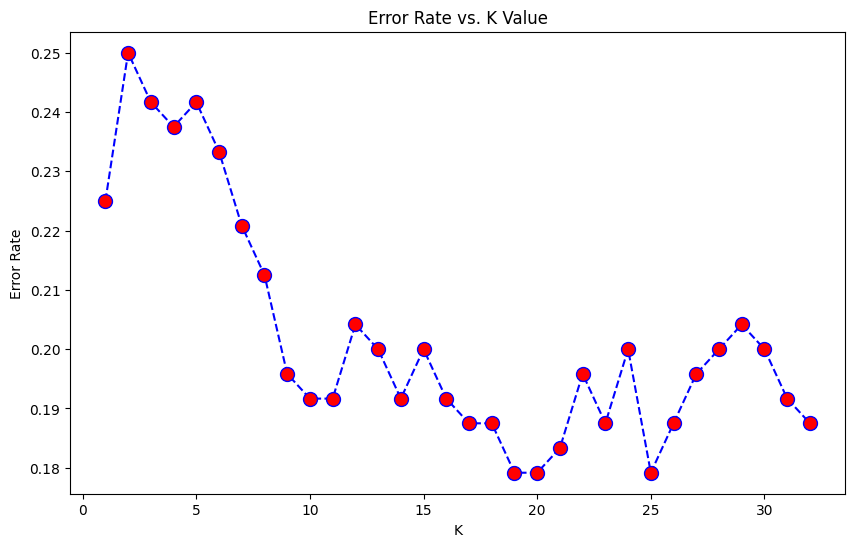

In [68]:
plt.figure(figsize=(10,6))
plt.plot(range(1,33),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

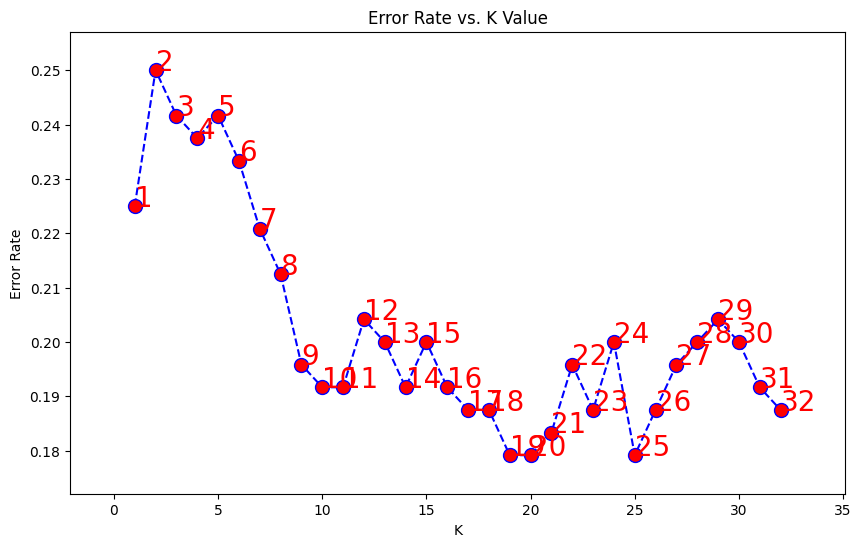

In [69]:
xs = range(1,33)
ys = error_rate
plt.figure(figsize=(10,6))
plt.plot(xs, ys,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
for x, y in zip(xs, ys):
    plt.text(x, y, str(x), color="red", fontsize=20)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
plt.margins(0.1)
plt.show()

#### Train

Conclusion best K-value is k = 25

In [70]:
clf_random_search_knn.best_params_

{'p': 2, 'n_neighbors': 38, 'metric': 'manhattan', 'algorithm': 'brute'}

In [71]:
knn_best = KNeighborsClassifier(n_neighbors=25, metric = 'manhattan', algorithm = 'brute',p = 2)

In [72]:
knn_best .fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=25)

In [73]:
knn_best.effective_metric_params_

{}

#### Evaluation

In [74]:
pred_i = knn_best.predict(X_test)

In [75]:
pred_i_proba = knn_best.predict_proba(X_test)

In [76]:
print(classification_report(y_test,pred_i))

              precision    recall  f1-score   support

           A       1.00      0.40      0.57         5
           B       0.79      0.79      0.79        34
           C       0.72      0.74      0.73        35
           D       0.69      0.50      0.58        40
           F       0.88      0.97      0.92       126

    accuracy                           0.82       240
   macro avg       0.82      0.68      0.72       240
weighted avg       0.81      0.82      0.81       240



In [77]:
df_knn_K_non_best_params_= pd.DataFrame(classification_report(y_test,pred_i,output_dict = True))

In [78]:
proba_df = pd.DataFrame(pred_i_proba * 100, columns=knn_best.classes_)

proba_df['actual'] = y_test.reset_index(drop=True)

proba_df['predicted_proba'] = pred_i

In [79]:
proba_df

,A,B,C,D,F,actual,predicted_proba
0,0.0,0.0,4.0,4.0,92.0,F,F
1,0.0,48.0,44.0,8.0,0.0,B,B
2,0.0,0.0,0.0,44.0,56.0,D,F
3,20.0,76.0,4.0,0.0,0.0,B,B
4,0.0,0.0,0.0,0.0,100.0,F,F
...,...,...,...,...,...,...,...
235,0.0,12.0,44.0,36.0,8.0,C,C
236,0.0,0.0,0.0,0.0,100.0,F,F
237,0.0,0.0,0.0,0.0,100.0,F,F
238,0.0,24.0,68.0,8.0,0.0,C,C


In [80]:
prediction_df = pd.DataFrame({
    "prediction":pred_i
})

In [81]:
pd.concat([X_test,prediction_df],axis = 1, join = 'inner')

,std_studyTimeWeekly,Absences,Tutoring,ParentalSupport,Sports,Music,Volunteering,prediction
196,-1.376969,0,0,1,0,0,1,F
134,1.692500,5,1,2,0,0,0,F
229,-0.961801,2,0,3,1,0,0,D
56,-1.566038,20,0,2,1,1,0,D
179,0.962083,1,0,3,0,0,1,F
111,-0.725786,2,1,4,0,1,0,F
44,1.618928,1,1,3,1,0,0,F
100,-0.662268,23,1,1,1,0,1,F
239,0.193950,16,0,1,0,1,0,F
173,1.599692,9,0,2,1,0,0,F


# Comparison

In [82]:
df_knn_K_non_best_params_

,A,B,C,D,F,accuracy,macro avg,weighted avg
precision,1.000000,0.794118,0.722222,0.689655,0.877698,0.820833,0.816739,0.814391
recall,0.400000,0.794118,0.742857,0.500000,0.968254,0.820833,0.681046,0.820833
f1-score,0.571429,0.794118,0.732394,0.579710,0.920755,0.820833,0.719681,0.811227
support,5.000000,34.000000,35.000000,40.000000,126.000000,0.820833,240.000000,240.000000


In [83]:
df_knn_eval_hyper_random_search

,A,B,C,D,F,accuracy,macro avg,weighted avg
precision,1.000000,0.794118,0.710526,0.700,0.890511,0.825,0.819031,0.821137
recall,0.200000,0.794118,0.771429,0.525,0.968254,0.825,0.651760,0.825000
f1-score,0.333333,0.794118,0.739726,0.600,0.927757,0.825,0.678987,0.814393
support,5.000000,34.000000,35.000000,40.000,126.000000,0.825,240.000000,240.000000


In [84]:
df_dec_tree_clf

,A,B,C,D,F,accuracy,macro avg,weighted avg
precision,0.736842,0.695652,0.666667,0.661376,0.932602,0.812709,0.738628,0.811068
recall,0.500000,0.756757,0.684783,0.606796,0.944444,0.812709,0.698556,0.812709
f1-score,0.595745,0.724919,0.675603,0.632911,0.938486,0.812709,0.713533,0.810958
support,28.000000,148.000000,184.000000,206.000000,630.000000,0.812709,1196.000000,1196.000000


Decision tree highest accuracy score

# Deployment

In [85]:
import pickle

In [86]:
pickle.dump(dec_tree,open("model_tree.pkl","wb"))